In [88]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import PIL
import cv2 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [39]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [40]:
data_dir

'.\\datasets\\flower_photos'

In [43]:
import os 
correct_path = os.path.join(data_dir, "flower_photos")
if os.path.exists(correct_path):
    data_dir = correct_path
data_dir    

'.\\datasets\\flower_photos\\flower_photos'

In [22]:
image = plt.imread('datasets/flower_photos/flower_photos/daisy/5547758_eea9edfd54_n.jpg')
image.shape

(232, 320, 3)

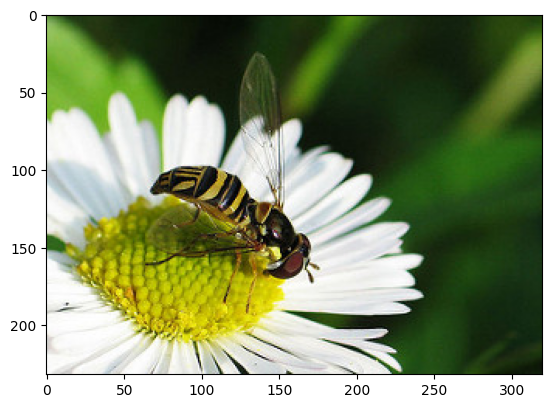

In [23]:
plt.imshow(image)

In [44]:
import pathlib
data_dir = pathlib.Path(data_dir) 
data_dir

WindowsPath('datasets/flower_photos/flower_photos')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

[WindowsPath('datasets/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/102841525_bd6628ae3c.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/1031799732_e7f4008c03.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10391248763_1d16681106_n.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10437754174_22ec990b77_m.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10437929963_bc13eebe0c.jpg'), WindowsPath('datasets/flower_photos/flower_pho

3670

In [46]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

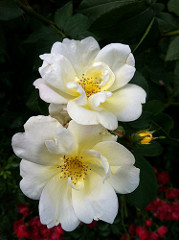

In [48]:
import PIL.Image


PIL.Image.open(roses[0])

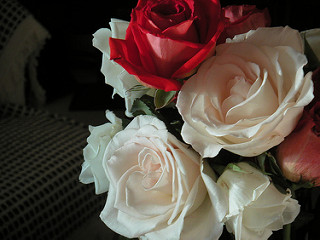

In [49]:
PIL.Image.open(roses[1])

In [50]:
flower_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [51]:
flower_label_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [52]:
flower_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [56]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [57]:
cv2.resize(image,(180,180)).shape

(180, 180, 3)

In [61]:
X , y = [] , []
for flower_name,flower_images in flower_images_dict.items():
    for image in flower_images:
        img = cv2.imread(str(image))
        resized = cv2.resize(img,(180,180))
        X.append(resized)
        y.append(flower_label_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

[0 0 0 ... 4 4 4]


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [71]:
print(X_train[0])

[[[ 68  79  77]
  [ 63  70  63]
  [ 60  62  56]
  ...
  [ 49  40  37]
  [ 48  39  36]
  [ 48  39  36]]

 [[ 57  62  60]
  [ 61  64  60]
  [ 60  61  55]
  ...
  [ 48  39  36]
  [ 48  39  36]
  [ 50  41  38]]

 [[ 61  58  57]
  [ 64  64  59]
  [ 59  59  53]
  ...
  [ 49  40  37]
  [ 49  40  37]
  [ 50  41  38]]

 ...

 [[ 49 121  93]
  [ 40  65  51]
  [ 52  96  67]
  ...
  [156 216 211]
  [161 216 212]
  [169 203 206]]

 [[ 48 119  90]
  [ 45  58  44]
  [ 50  91  60]
  ...
  [217 233 238]
  [201 212 215]
  [185 168 175]]

 [[ 54 121  95]
  [ 46  58  46]
  [ 46  89  60]
  ...
  [227 245 248]
  [219 201 204]
  [108  81  83]]]


In [69]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

2752
2752
918
918


In [67]:
X_train = X_train / 255 # normalize images
X_test = X_test / 255

2752

In [162]:
def predict(model,image_name):
    image = cv2.imread(image_name)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # convert to RGB

    plt.imshow(image,cmap=plt.cm.binary)

    prediction = model.predict(np.array([image]) / 255) # normalize input and predict
    index = np.argmax(prediction) # choose most probability in 10 output
    for name,label in flower_label_dict.items():
        if label == index:  
            print("Prediction:",name)
            break

In [75]:
model = Sequential([
  Conv2D(16, 3, padding='same', activation='relu'), # (3x3) 16 filters 
  MaxPooling2D(),

  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),

  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),

  Dense(128, activation='relu'),
  Dense(5,activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [83]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [84]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.8072 - loss: 0.5328 - val_accuracy: 0.5425 - val_loss: 1.3735
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.8950 - loss: 0.3188 - val_accuracy: 0.5490 - val_loss: 1.8375
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - accuracy: 0.9158 - loss: 0.2882 - val_accuracy: 0.5708 - val_loss: 1.7432
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.9594 - loss: 0.1485 - val_accuracy: 0.5566 - val_loss: 1.9761
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.9808 - loss: 0.0657 - val_accuracy: 0.5904 - val_loss: 2.2182
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.9843 - loss: 0.0570 - val_accuracy: 0.5643 - val_loss: 2.4038
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9849 - loss: 0.0564 - val_accuracy: 0.5632 - val_loss: 2.4821
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.9934 - loss: 0.0273 - val_accu

In [86]:
loss,accuracy = model.evaluate(X_test,y_test)
print(f"Loss:{loss}\nAccuracy:{accuracy}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5331 - loss: 1.4229
Loss:1.3734698295593262
Accuracy:0.5424836874008179


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: dandelion


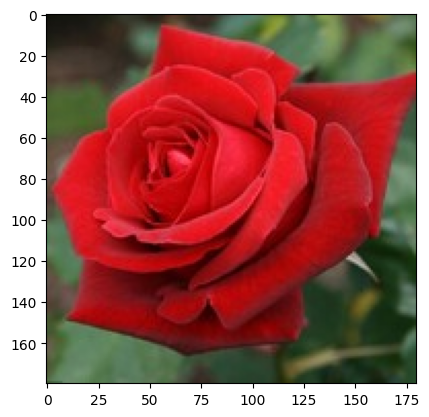

In [ ]:
predict(model,'gul.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: dandelion


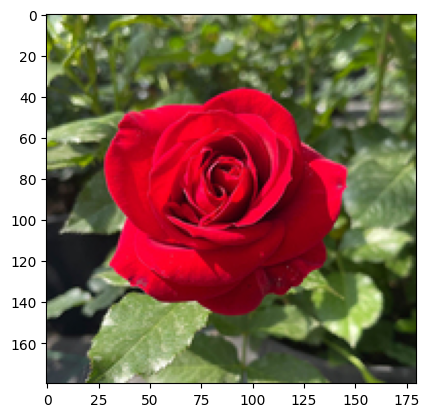

In [166]:
predict(model,'gul2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediction: dandelion


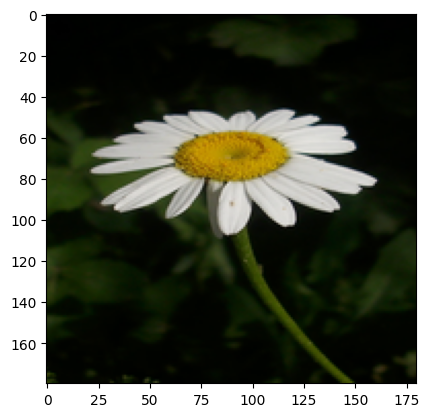

In [171]:
predict(model,'papatya.png')

In [134]:
train_images = []
train_labels = []
test_images = []
test_labels = []

for name,flower_images in flower_images_dict.items():
    for x in flower_images:
        train_images.append(str(x))
        train_labels.append(name)

train_images,test_images,train_labels,test_labels = train_test_split(train_images,train_labels,random_state=0)
print(len(train_images))
print(len(train_labels))
data = {
    'filepath' : train_images,
    'label' : train_labels
}
train_df = pd.DataFrame(data)

print(len(train_df))

train_data_gen = ImageDataGenerator(  # increase data and variety , avoid overfitting
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_data_gen.flow_from_dataframe(
    dataframe =  train_df,
    x_col='filepath',           
    y_col='label',              
    target_size=(180, 180),     # rescale images to 384x384          
    class_mode='categorical',   # Label type
    seed=42,                     
    shuffle=False              # shuffle data
)


2752
2752
2752
Found 2752 validated image filenames belonging to 5 classes.


In [135]:
data = {
    'filepath' : test_images,
    'label' : test_labels
}
test_df = pd.DataFrame(data)

print(len(test_df))

test_data_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_data_gen.flow_from_dataframe(
    dataframe =  test_df,
    x_col='filepath',           
    y_col='label',              
    target_size=(180, 180),     # rescale images to 384x384          
    class_mode='categorical',   # Label type
    seed=42,                     
    shuffle=False                # shuffle data
)

918
Found 918 validated image filenames belonging to 5 classes.


In [136]:
model2 = Sequential([
  Conv2D(16, 3, padding='same', activation='relu'), # (3x3) 16 filters 
  MaxPooling2D(),

  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),

  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),

  Dense(128, activation='relu'),
  Dense(5,activation='softmax')
])
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [137]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
x_batch_train, y_batch_train = next(train_generator)
x_batch_test, y_batch_test = next(test_generator)

print("Train Data Shape:", x_batch_train.shape)
print("Train Labels Shape:", y_batch_train.shape)
print("Test Data Shape:", x_batch_test.shape)
print("Test Labels Shape:", y_batch_test.shape)


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
len(train_generator)
len(test_generator)

(32, 180, 180, 3)
(32, 5)
Train Data Shape: (32, 180, 180, 3)
Train Labels Shape: (32, 5)
Test Data Shape: (32, 180, 180, 3)
Test Labels Shape: (32, 5)


29

In [140]:
model2.fit(train_generator,
           epochs=10,
           steps_per_epoch=len(train_generator),  
           validation_data=test_generator,
           validation_steps = len(test_generator),
           callbacks = [early_stopping])  

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.5833 - loss: 1.0555

c:\Users\Furkan-PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 290ms/step - accuracy: 0.5833 - loss: 1.0554 - val_accuracy: 0.6166 - val_loss: 0.9795
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 274ms/step - accuracy: 0.6003 - loss: 1.0141 - val_accuracy: 0.6460 - val_loss: 0.8802
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 275ms/step - accuracy: 0.6325 - loss: 0.9226 - val_accuracy: 0.6580 - val_loss: 0.8715
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 275ms/step - accuracy: 0.6877 - loss: 0.8252 - val_accuracy: 0.6601 - val_loss: 0.8332
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 281ms/step - accuracy: 0.6825 - loss: 0.8299 - val_accuracy: 0.6906 - val_loss: 0.7952
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 272ms/step - accuracy: 0.7244 - loss: 0.7527 - val_accuracy: 0.6841 - val_loss: 0.8400
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 272ms/step - accuracy: 0.7212 - loss: 0.7383 - val_accuracy: 0.6797 - val_loss: 0.8070
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 274ms/step - accuracy: 0.7137 - loss: 0.7490 - val_accuracy: 0.700

In [144]:
loss,accuracy = model2.evaluate(test_generator)
print(f"Loss:{loss}\nAccuracy:{accuracy}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.7363 - loss: 0.6798
Loss:0.699342668056488
Accuracy:0.7363834381103516


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: dandelion


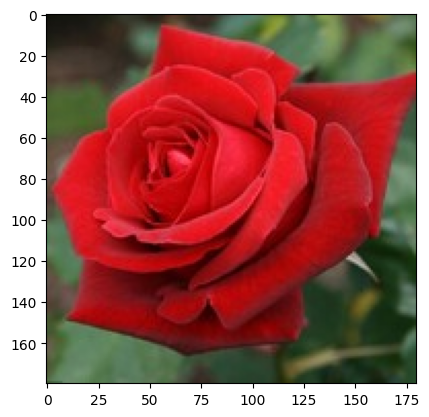

In [167]:
predict(model2,'gul.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: dandelion


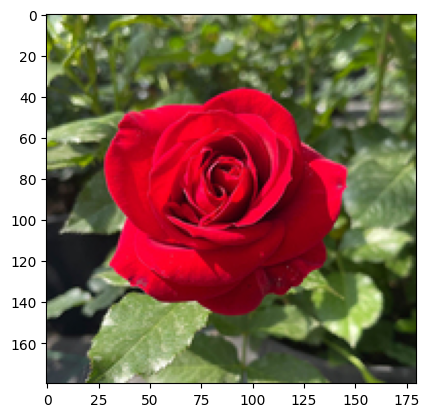

In [168]:
predict(model2,'gul2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: roses


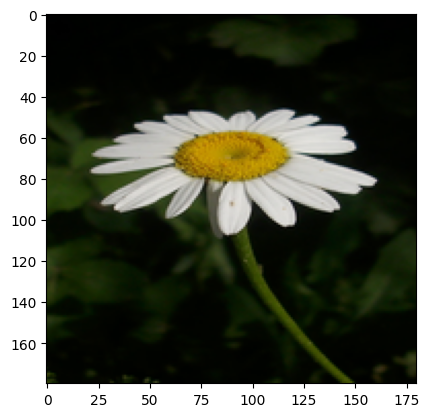

In [172]:
predict(model2,'papatya.png')

In [156]:
model3 = Sequential([
  Conv2D(16, 3, padding='same', activation='relu'), # (3x3) 16 filters 
  MaxPooling2D(),

  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),

  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),

  Dense(128, activation='relu'),
  Dense(5,activation='softmax')
])
model3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [157]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [158]:
model3.fit(train_generator,
           epochs=50,
           steps_per_epoch=len(train_generator),  
           validation_data=test_generator,
           validation_steps = len(test_generator),
           callbacks = [early_stopping])  

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 292ms/step - accuracy: 0.3064 - loss: 1.5682 - val_accuracy: 0.4967 - val_loss: 1.1483
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 280ms/step - accuracy: 0.5760 - loss: 1.0666 - val_accuracy: 0.5828 - val_loss: 1.0312
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 275ms/step - accuracy: 0.6106 - loss: 0.9960 - val_accuracy: 0.5926 - val_loss: 1.0316
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 276ms/step - accuracy: 0.6380 - loss: 0.9242 - val_accuracy: 0.6460 - val_loss: 0.9366
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 276ms/step - accuracy: 0.6559 - loss: 0.8647 - val_accuracy: 0.6481 - val_loss: 0.8955
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 278ms/step - accuracy: 0.6875 - loss: 0.7882 - val_accuracy: 0.6634 - val_loss: 0.8586
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 277ms/step - accuracy: 0.7040 - loss: 0.7893 - val_accuracy: 0.6765 - val_loss: 0.8627
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 277ms/step - accuracy: 0.7116 - loss: 0.7651 - val_accu

In [159]:
loss,accuracy = model3.evaluate(test_generator)
print(f"Loss:{loss}\nAccuracy:{accuracy}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.7753 - loss: 0.5536
Loss:0.5793203115463257
Accuracy:0.7821350693702698


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction: tulips


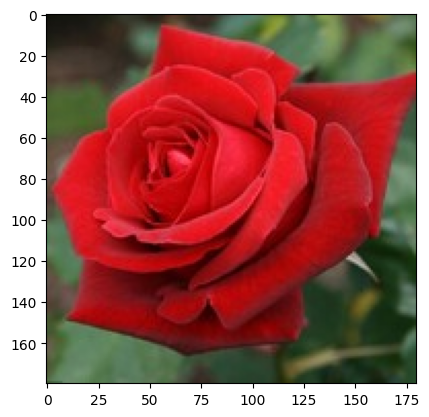

In [169]:
predict(model3,'gul.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: dandelion


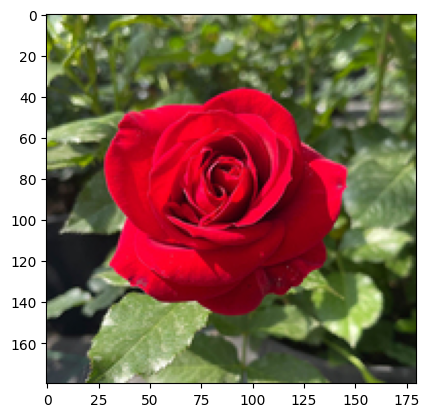

In [170]:
predict(model3,'gul2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction: roses


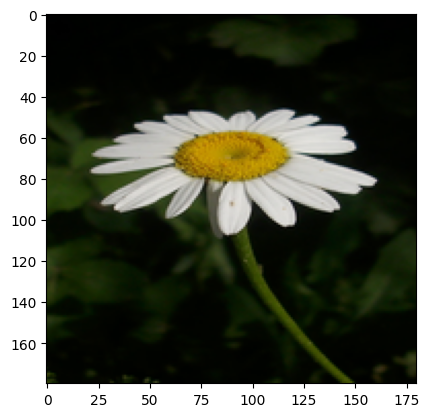

In [173]:
predict(model3,'papatya.png')